# Case studies

## Vitis vinifera phenolics

In [1]:
# Load data
from deepmol.loaders import CSVLoader

grape_vine_dataset = CSVLoader("case_studies/vitis_vinifera.csv", smiles_field="smiles", id_field="id").create_dataset()

In [2]:
from deepmol.pipeline import Pipeline

best_pipeline = Pipeline.load("sm_predictor_pipeline_motpe/trial_311")

2023-09-18 20:38:26.149522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-18 20:38:27.215248: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.
[20:38:30] Initializing Normalizer


In [3]:
import numpy as np

labels = np.array(['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
       'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
       'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
       'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
       'C09762'])

labels_ = {
    'C00341': 'Geranyl diphosphate',
    'C01789': 'Campesterol',
    'C00078': 'Tryptophan',
    'C00049': 'L-Aspartate',
    'C00183': 'L-Valine',
    'C03506': 'Indoleglycerol phosphate',
    'C00187': 'Cholesterol',
    'C00079': 'L-Phenylalanine',
    'C00047': 'L-Lysine',
    'C01852': 'Secologanin',
    'C00407': 'L-Isoleucine',
    'C00129': 'Isopentenyl diphosphate',
    'C00235': 'Dimethylallyl diphosphate',
    'C00062': 'L-Arginine',
    'C00353': 'Geranylgeranyl diphosphate',
    'C00148': 'L-Proline',
    'C00073': 'L-Methionine',
    'C00108': 'Anthranilate',
    'C00123': 'L-Leucine',
    'C00135': 'L-Histidine',
    'C00448': 'Farnesyl diphosphate',
    'C00082': 'L-Tyrosine',
    'C00041': 'L-Alanine',
    'C00540': 'Cinnamoyl-CoA',
    'C01477': 'Apigenin',
    'C05903': 'Kaempferol',
    'C05904': 'Pelargonin',
    'C05905': 'Cyanidin',
    'C05908': 'Delphinidin',
    'C00389': 'Quercetin',
    'C01514': 'Luteolin',
    'C09762': "Liquiritigenin",
    'C00509': 'Naringenin',
    'C00223': 'p-Coumaroyl-CoA'
}

labels_names = np.array([labels_[label] for label in labels])
labels_names

array(['L-Methionine', 'Tryptophan', 'L-Phenylalanine', 'L-Tyrosine',
       'Dimethylallyl diphosphate', 'Geranyl diphosphate',
       'Geranylgeranyl diphosphate', 'Farnesyl diphosphate',
       'Campesterol', 'Indoleglycerol phosphate', 'L-Lysine',
       'Anthranilate', 'Cholesterol', 'L-Proline', 'L-Alanine',
       'Isopentenyl diphosphate', 'L-Arginine', 'Secologanin',
       'L-Aspartate', 'L-Histidine', 'p-Coumaroyl-CoA', 'Naringenin',
       'Cinnamoyl-CoA', 'Apigenin', 'Kaempferol', 'Pelargonin',
       'Cyanidin', 'Delphinidin', 'Liquiritigenin'], dtype='<U26')

In [4]:
predictions = best_pipeline.predict(grape_vine_dataset)
ones = predictions == 1
labels_all = []
for i, prediction in enumerate(ones):
    labels_all.append(";".join(labels_names[prediction]))

[20:38:31] Running Normalizer
[20:38:31] Running Normalizer
[20:38:31] Running Uncharger
[20:38:31] Running Normalizer
[20:38:31] Running Normalizer
[20:38:31] Running Normalizer
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Normalizer
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Normalizer
[20:38:31] Running Normalizer
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Normalizer
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:38:31] Running Uncharger
[20:3

In [5]:
labels_all

['Geranyl diphosphate',
 'Geranyl diphosphate',
 'Farnesyl diphosphate',
 'L-Phenylalanine;Delphinidin',
 'L-Phenylalanine;Delphinidin',
 'L-Phenylalanine;p-Coumaroyl-CoA',
 'L-Phenylalanine;Kaempferol',
 'L-Phenylalanine;Kaempferol',
 'L-Phenylalanine;Kaempferol']

In [6]:
from PIL import Image
import io
from rdkit.Chem.Draw import SimilarityMaps

def show_png(data):
    bio = io.BytesIO(data)
    img = Image.open(bio)
    return img

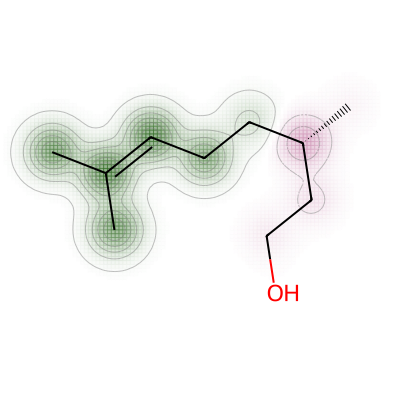

In [8]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("CC(=CCC/C(=C/COP(=O)(O)O)/C)C"), grape_vine_dataset.mols[1], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("CC(=CCC/C(=C/COP(=O)(O)O)/C)C"), grape_vine_dataset.mols[1], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

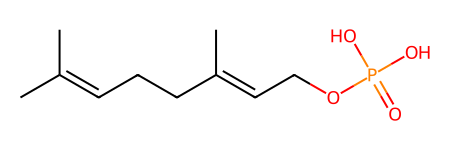

In [9]:
MolFromSmiles("CC(=CCC/C(=C/COP(=O)(O)O)/C)C")

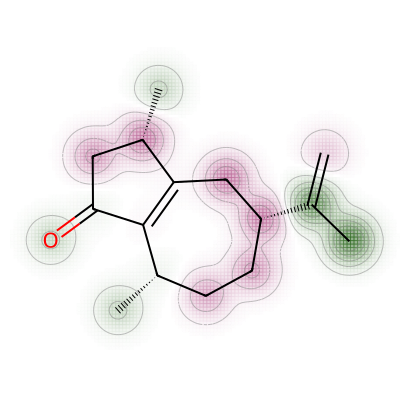

In [11]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("CC(=CCC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)C"), grape_vine_dataset.mols[2], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

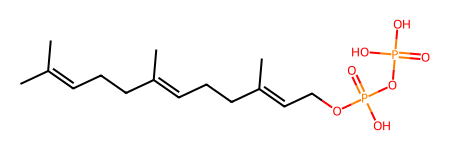

In [12]:
MolFromSmiles("CC(=CCC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)C")

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("CC(=CCC/C(=C/CC/C(=C/COP(=O)(O)OP(=O)(O)O)/C)/C)C"), grape_vine_dataset.mols[2], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

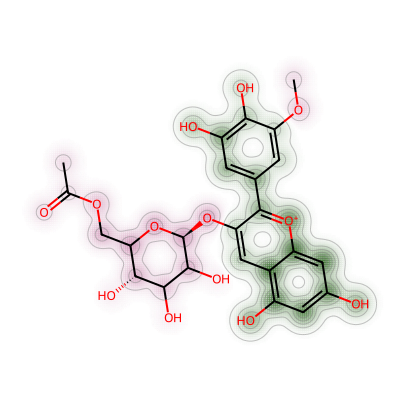

In [14]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("C1=C(C=C(C(=C1O)O)O)C2=[O+]C3=CC(=CC(=C3C=C2O)O)O"), grape_vine_dataset.mols[3], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

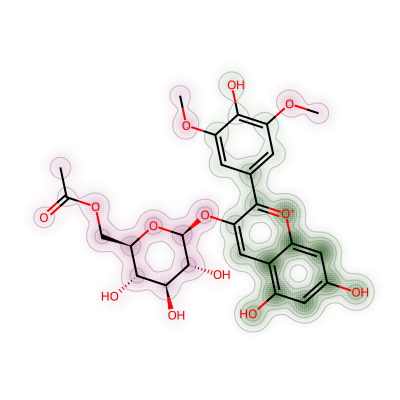

In [15]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("C1=C(C=C(C(=C1O)O)O)C2=[O+]C3=CC(=CC(=C3C=C2O)O)O"), grape_vine_dataset.mols[4], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

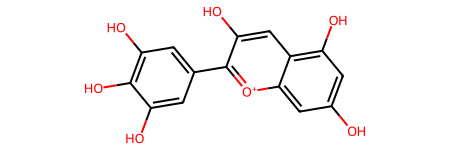

In [16]:
MolFromSmiles("C1=C(C=C(C(=C1O)O)O)C2=[O+]C3=CC(=CC(=C3C=C2O)O)O")

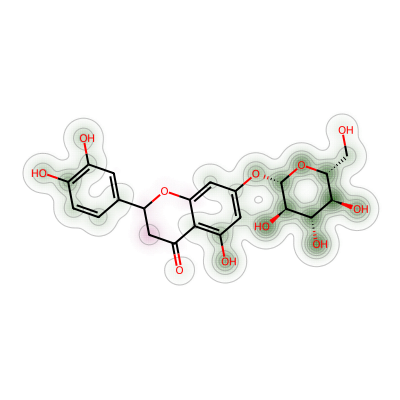

In [18]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("CC(C)(COP(=O)(O)OP(=O)(O)OC[C@@H]1[C@H]([C@H]([C@@H](O1)N2C=NC3=C(N=CN=C32)N)O)OP(=O)(O)O)[C@H](C(=O)NCCC(=O)NCCSC(=O)/C=C/C4=CC=C(C=C4)O)O"), grape_vine_dataset.mols[5], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

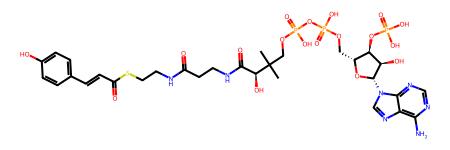

In [19]:
MolFromSmiles("CC(C)(COP(=O)(O)OP(=O)(O)OC[C@@H]1[C@H]([C@H]([C@@H](O1)N2C=NC3=C(N=CN=C32)N)O)OP(=O)(O)O)[C@H](C(=O)NCCC(=O)NCCSC(=O)/C=C/C4=CC=C(C=C4)O)O")

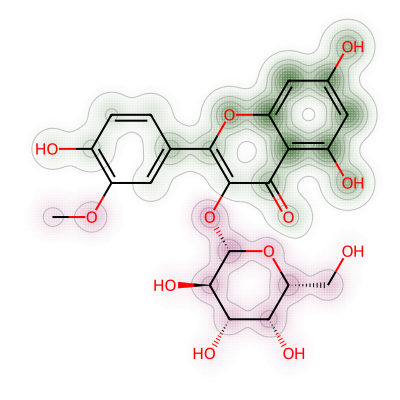

In [21]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("C1=CC(=CC=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O"), grape_vine_dataset.mols[6], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

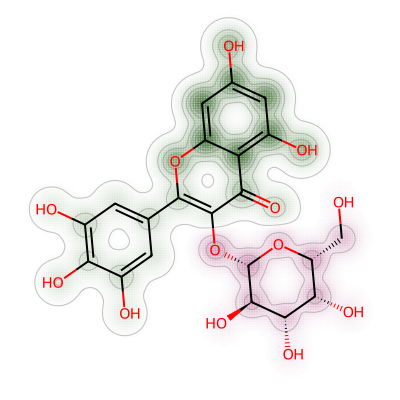

In [22]:
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import MolFromSmiles
from rdkit import Chem



d = Chem.Draw.MolDraw2DCairo(400, 400)
_, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(MolFromSmiles("C1=CC(=CC=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O"), grape_vine_dataset.mols[7], lambda m, i: SimilarityMaps.GetMorganFingerprint(m, i, radius=2, fpType='bv'), 
                                        draw2d=d)
d.FinishDrawing()
show_png(d.GetDrawingText())

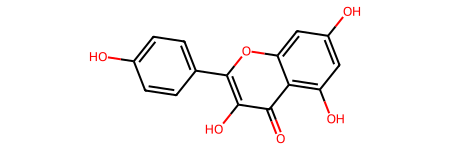

In [23]:
MolFromSmiles("C1=CC(=CC=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O")